<font size="6">**Pemodelan pengaruh Bencana Banjir dan Kondisi Ekonomi Regional terhadap PDRB Indonesia menggunakan Machine Learning**</font>

<font size="4">Adamantine's Intro to Data Mining Final Project</font>


# Intro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load data
data = pd.read_excel('Main Data - Copy.xlsx')
data.head()

Provinsi  Tahun      Y(PDRB)  Frekuensi curah hujan (sedang)  \
0            ACEH   2023  146932422.1                           27.83   
1  SUMATERA UTARA   2023  602235951.9                           19.68   
2  SUMATERA BARAT   2023  191071350.9                           29.05   
3            RIAU   2023  551828486.3                            6.63   
4           JAMBI   2023  169268774.3                           12.53   

   Frekuensi curah hujan (lebat)  Curah Hujan dalam mm  Jumlah Bencana  \
0                           1.56               2976.24            97.0   
1                           0.63               2841.55           112.0   
2                           1.32               3198.50            72.0   
3                           0.00               2519.26            79.0   
4                           0.10               2802.10            24.0   

   Korban Meninggal  Korban Hilang  Korban Lukaluka  Korban Menderita  \
0               5.0            0.0              7.0          329350.0   
1              10.0           11.0            102.0          157929.0   
2               7.0            2.0           4593.0           65459.0   
3               1.0            0.0              0.0          433175.0   
4               5.0            0.0              4.0           59018.0   

   Korban Mengungsi  Bangunan terdampak  indeks bencana  Jumlah Penduduk  \
0           25240.0              1355.0      160.452174        5515839.0   
1            3193.0               116.0      150.218182       15471582.0   
2            4175.0               729.0      153.157895        5750326.0   
3            8784.0             11476.0      150.800000        6861237.0   
4            6400.0               606.0      142.145455        3760275.0   

   Tingkat Pengagguran Terbuka  \
0                         6.03   
1                         5.89   
2                         5.94   
3                         4.23   
4                         4.53   

   Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov  \
0                                              248.6              
1                                             1181.3              
2                                              120.7              
3                                             2042.3              
4                                               45.1              

   Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov  
0                                             8883.3              
1                                            21574.0              
2                                             4488.2              
3                                            48243.3              
4                                             8939.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Provinsi                                                       306 non-null    object 
 1   Tahun                                                          306 non-null    int64  
 2   Y(PDRB)                                                        306 non-null    float64
 3   Frekuensi curah hujan (sedang)                                 297 non-null    float64
 4   Frekuensi curah hujan (lebat)                                  297 non-null    float64
 5   Curah Hujan dalam mm                                           297 non-null    float64
 6   Jumlah Bencana                                                 301 non-null    float64
 7   Korban Meninggal                                              

In [4]:
data.isna().sum()

Provinsi                                                         0
Tahun                                                            0
Y(PDRB)                                                          0
Frekuensi curah hujan (sedang)                                   9
Frekuensi curah hujan (lebat)                                    9
Curah Hujan dalam mm                                             9
Jumlah Bencana                                                   5
Korban Meninggal                                                 5
Korban Hilang                                                    5
Korban Lukaluka                                                  5
Korban Menderita                                                 5
Korban Mengungsi                                                 5
Bangunan terdampak                                               5
indeks bencana                                                   0
Jumlah Penduduk                                               

In [5]:
data.columns

Index(['Provinsi', 'Tahun', 'Y(PDRB)', 'Frekuensi curah hujan (sedang)',
       'Frekuensi curah hujan (lebat)', 'Curah Hujan dalam mm',
       'Jumlah Bencana', 'Korban Meninggal', 'Korban Hilang',
       'Korban Lukaluka', 'Korban Menderita', 'Korban Mengungsi',
       'Bangunan terdampak', 'indeks bencana', 'Jumlah Penduduk',
       'Tingkat Pengagguran Terbuka',
       'Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov',
       'Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov'],
      dtype='object')

# Preprocessing Part 1

---
Cek Persebaran Missing Values

<Axes: >

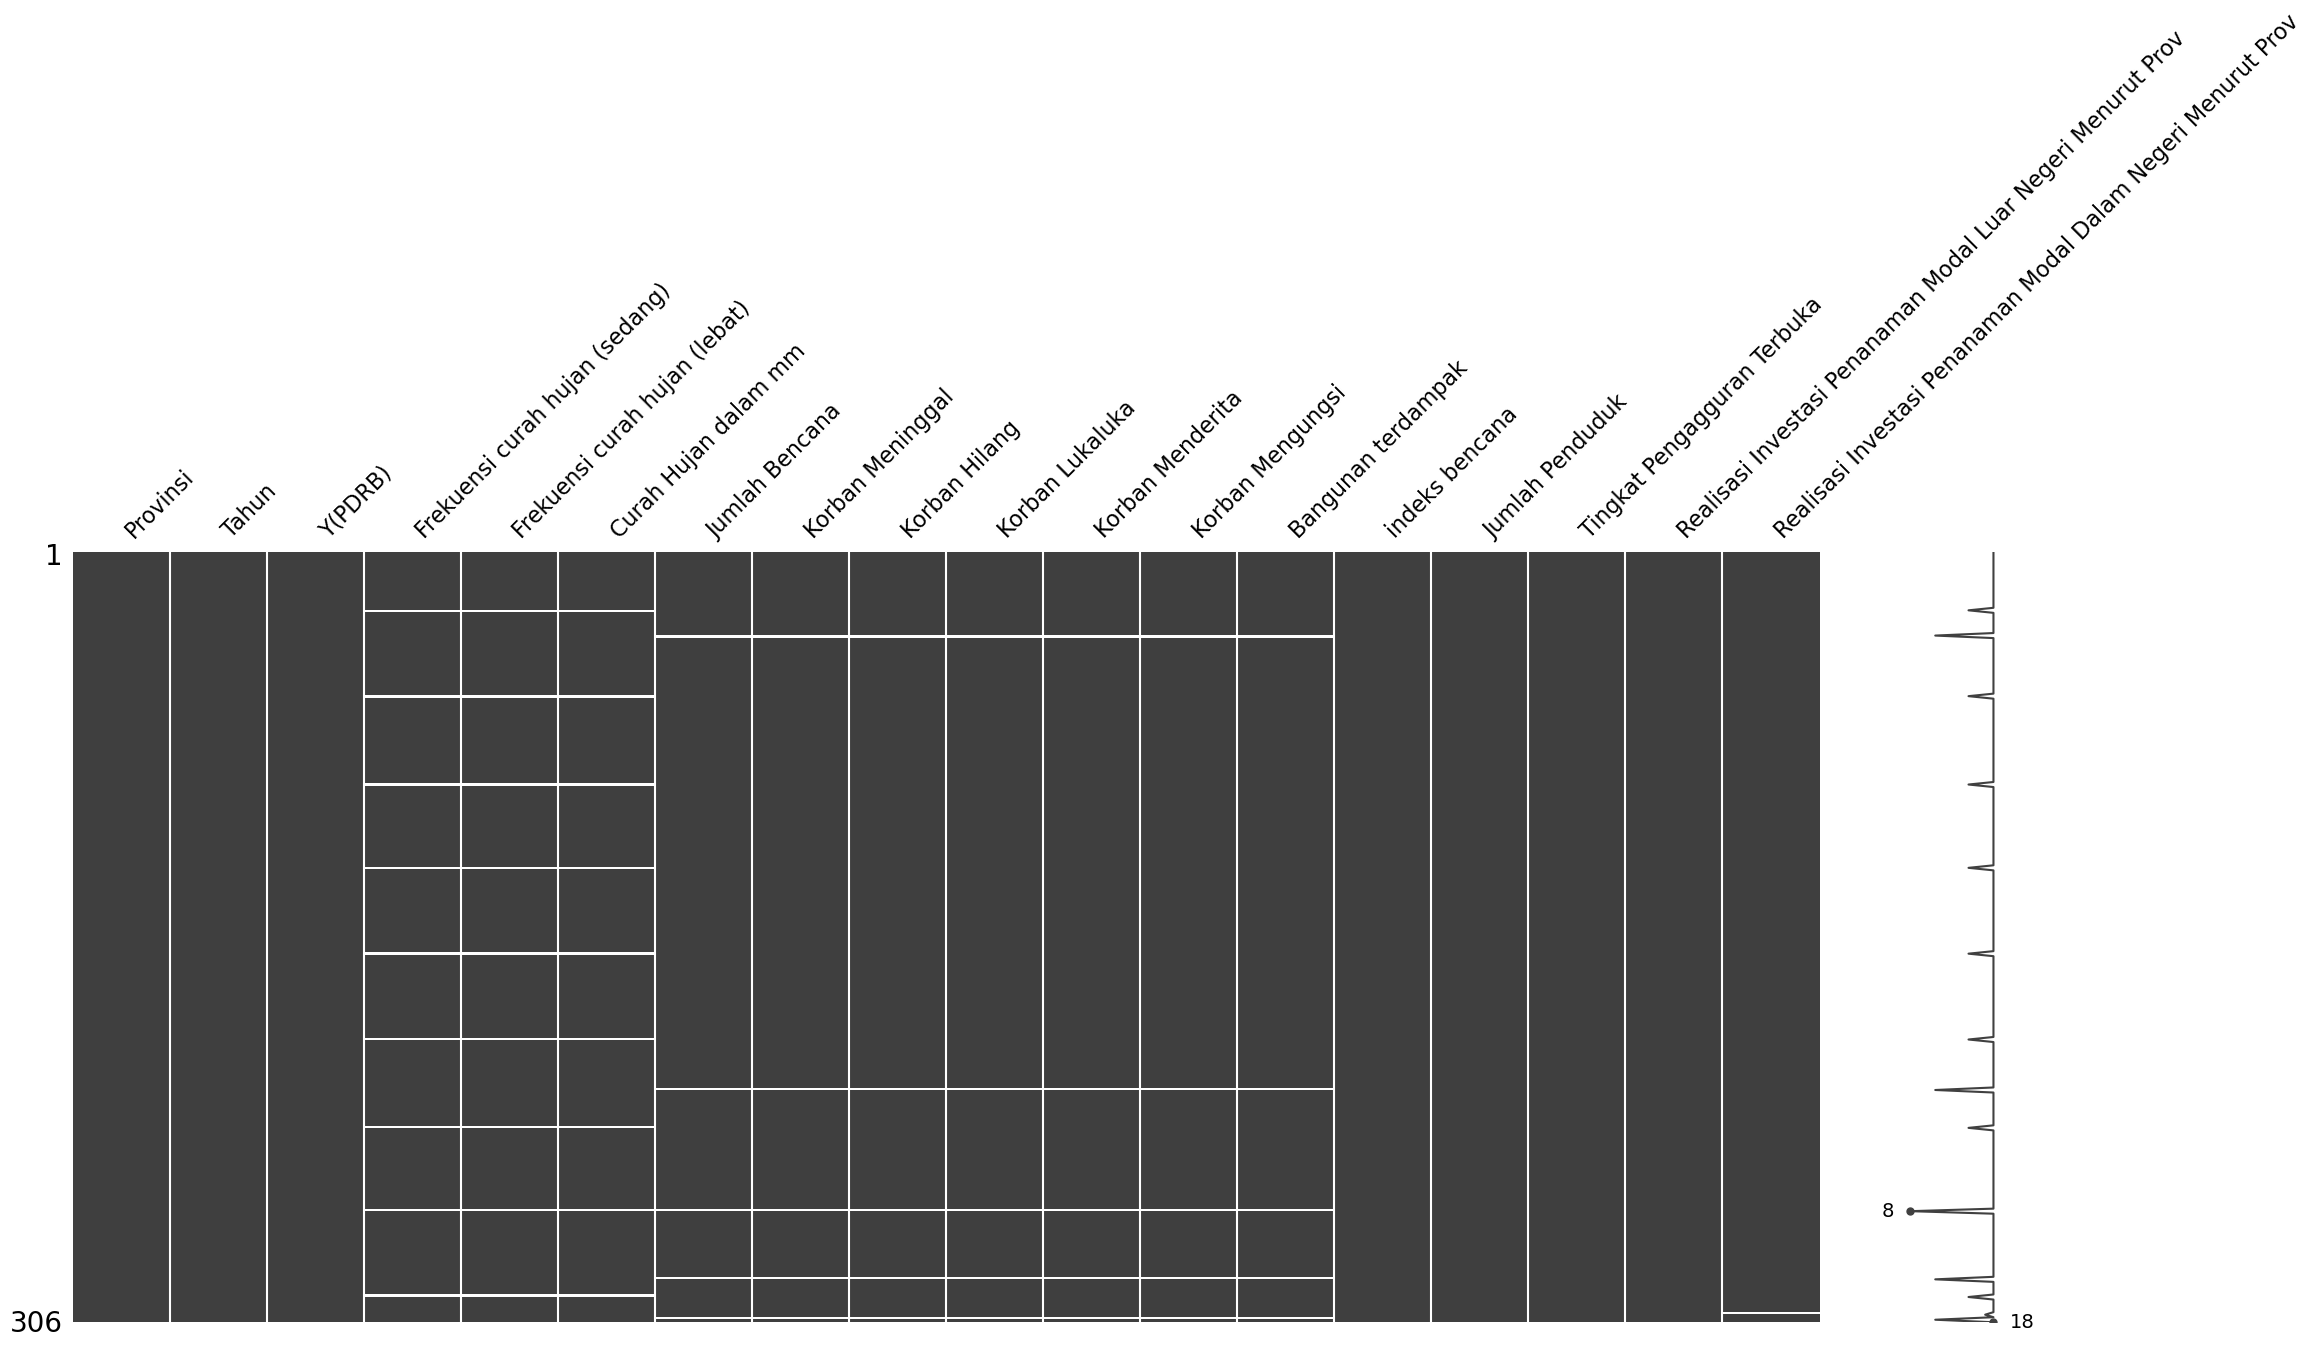

In [6]:
import missingno as mno

mno.matrix(data)

---
Mengganti tipe data kolom Tahun dari numerik menjadi string (object) sehingga mempermudah proses EDA.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Provinsi                                                       306 non-null    object 
 1   Tahun                                                          306 non-null    int64  
 2   Y(PDRB)                                                        306 non-null    float64
 3   Frekuensi curah hujan (sedang)                                 297 non-null    float64
 4   Frekuensi curah hujan (lebat)                                  297 non-null    float64
 5   Curah Hujan dalam mm                                           297 non-null    float64
 6   Jumlah Bencana                                                 301 non-null    float64
 7   Korban Meninggal                                              

In [8]:
data.head()

Provinsi  Tahun      Y(PDRB)  Frekuensi curah hujan (sedang)  \
0            ACEH   2023  146932422.1                           27.83   
1  SUMATERA UTARA   2023  602235951.9                           19.68   
2  SUMATERA BARAT   2023  191071350.9                           29.05   
3            RIAU   2023  551828486.3                            6.63   
4           JAMBI   2023  169268774.3                           12.53   

   Frekuensi curah hujan (lebat)  Curah Hujan dalam mm  Jumlah Bencana  \
0                           1.56               2976.24            97.0   
1                           0.63               2841.55           112.0   
2                           1.32               3198.50            72.0   
3                           0.00               2519.26            79.0   
4                           0.10               2802.10            24.0   

   Korban Meninggal  Korban Hilang  Korban Lukaluka  Korban Menderita  \
0               5.0            0.0              7.0          329350.0   
1              10.0           11.0            102.0          157929.0   
2               7.0            2.0           4593.0           65459.0   
3               1.0            0.0              0.0          433175.0   
4               5.0            0.0              4.0           59018.0   

   Korban Mengungsi  Bangunan terdampak  indeks bencana  Jumlah Penduduk  \
0           25240.0              1355.0      160.452174        5515839.0   
1            3193.0               116.0      150.218182       15471582.0   
2            4175.0               729.0      153.157895        5750326.0   
3            8784.0             11476.0      150.800000        6861237.0   
4            6400.0               606.0      142.145455        3760275.0   

   Tingkat Pengagguran Terbuka  \
0                         6.03   
1                         5.89   
2                         5.94   
3                         4.23   
4                         4.53   

   Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov  \
0                                              248.6              
1                                             1181.3              
2                                              120.7              
3                                             2042.3              
4                                               45.1              

   Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov  
0                                             8883.3              
1                                            21574.0              
2                                             4488.2              
3                                            48243.3              
4                                             8939.0

# EDA

### 1 - Melihat distribusi tiap variabel numerik dengan boxplot dan histogram.

C:\Users\Mahendra\AppData\Local\Temp\ipykernel_16032\1983913831.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[vars[i]], ax=ax[1], color = 'skyblue')
C:\Users\Mahendra\AppData\Local\Temp\ipykernel_16032\1983913831.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[vars[i]], ax=ax

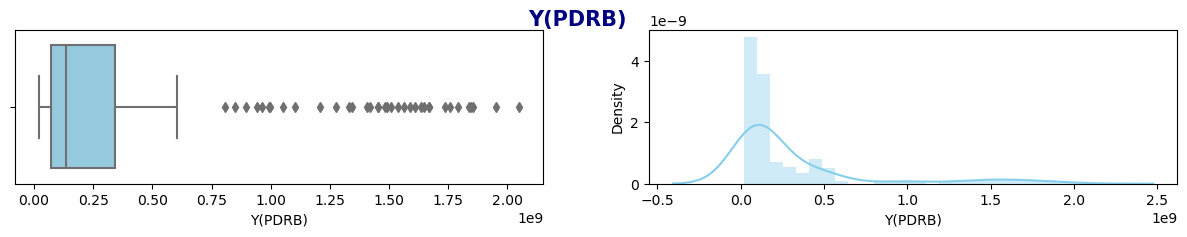

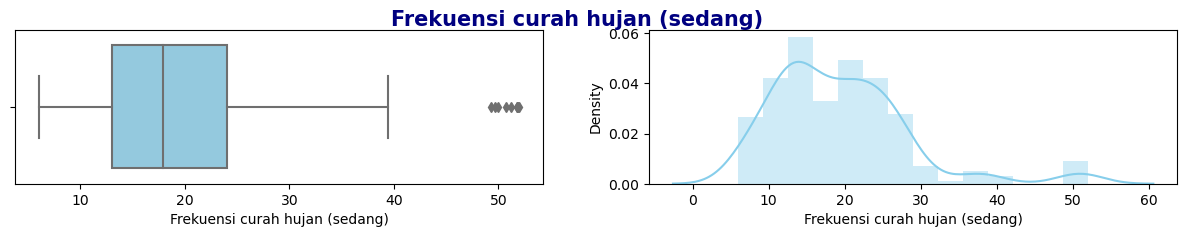

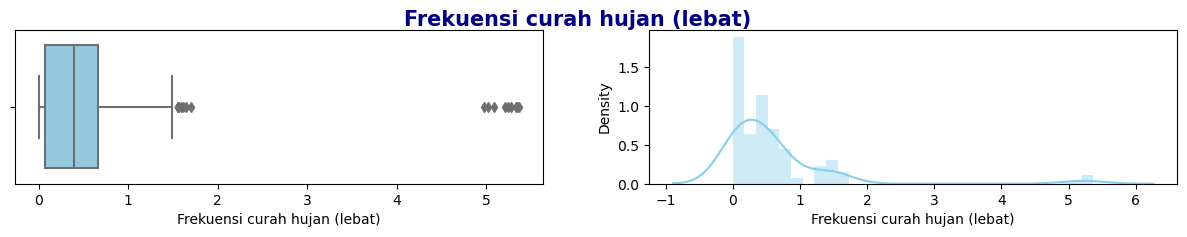

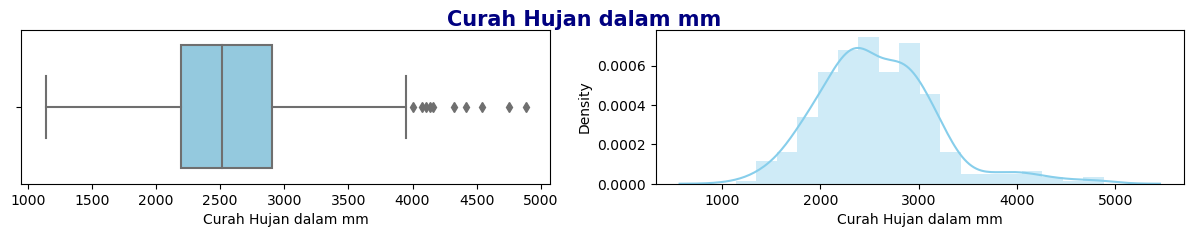

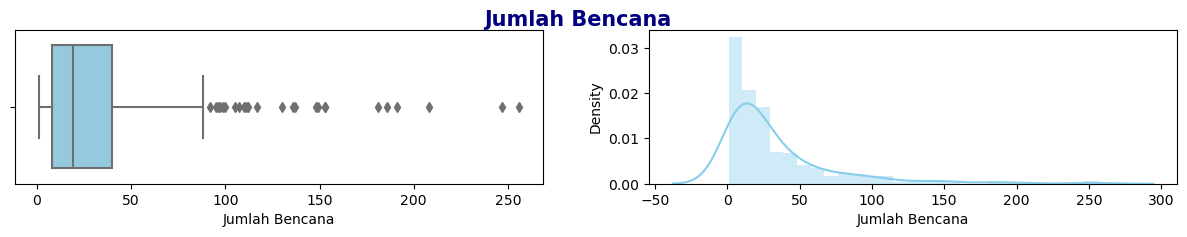

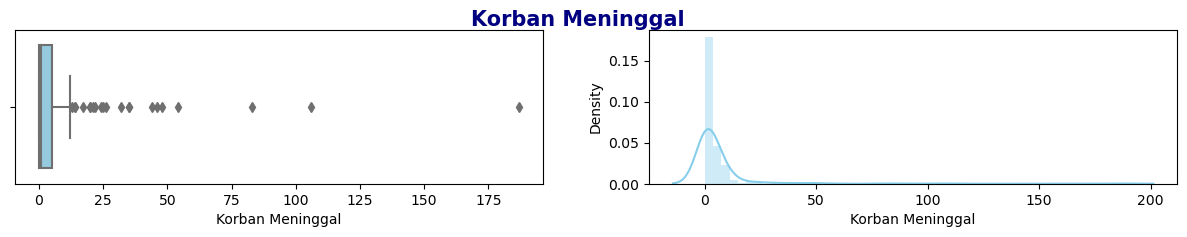

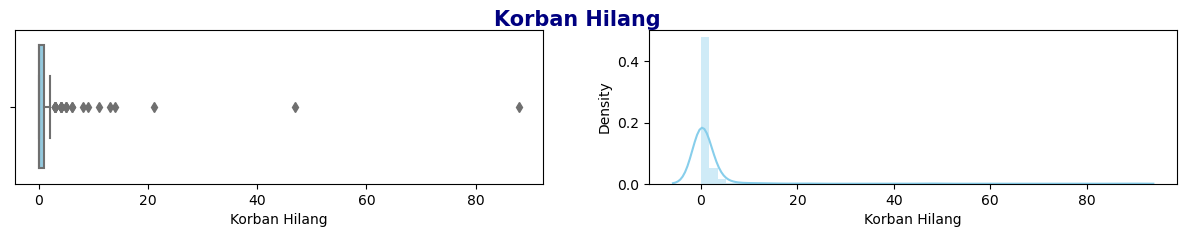

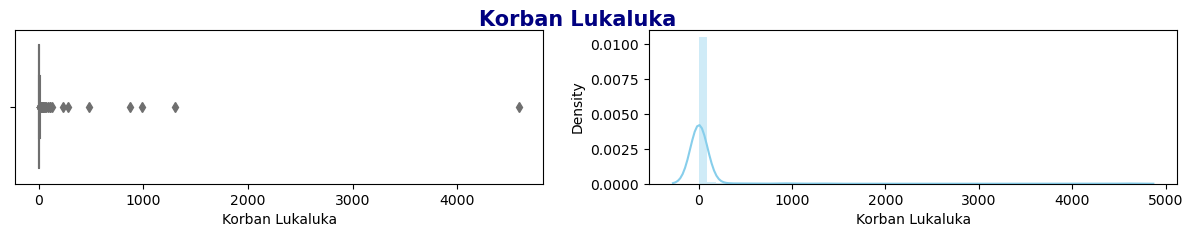

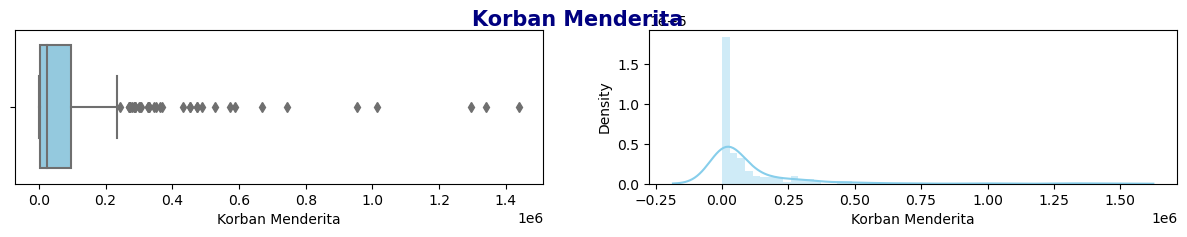

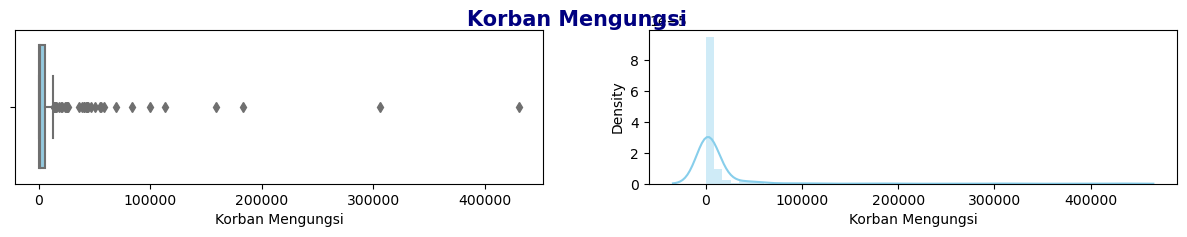

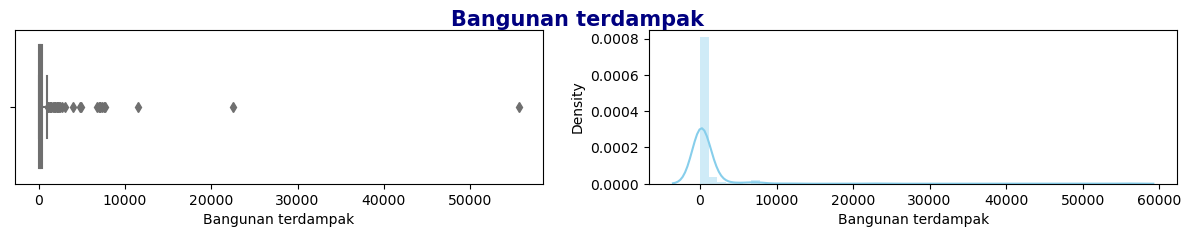

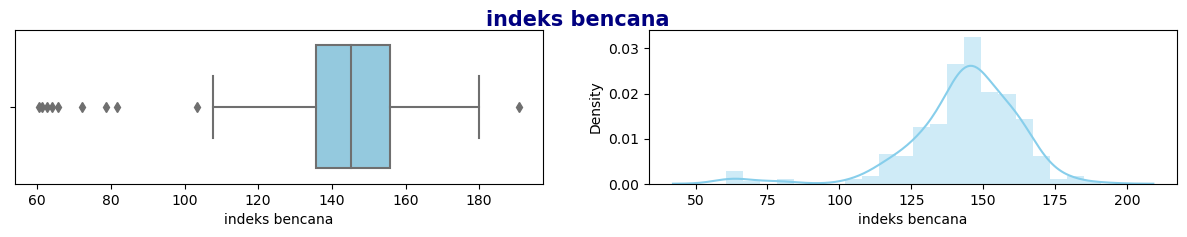

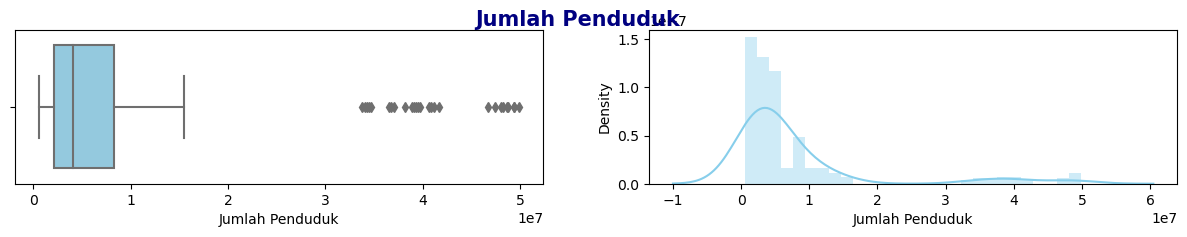

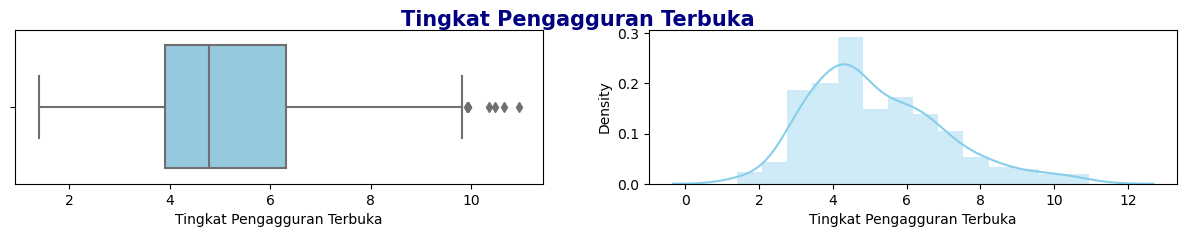

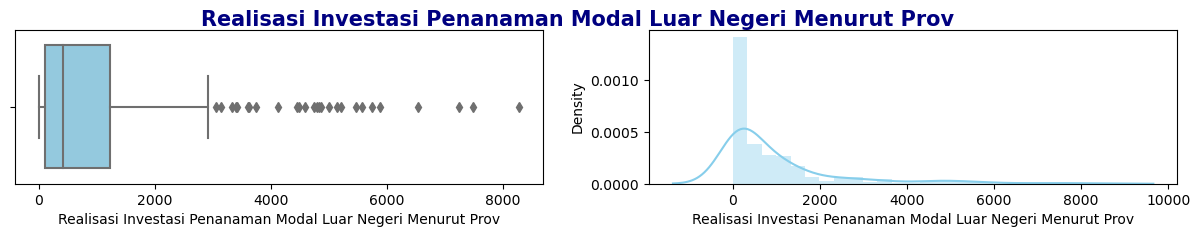

In [9]:
vars = data.columns[-16:]
for i in range(0, 15) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(vars[i], fontsize=15, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(x=vars[i], data=data, ax=ax[0], color = 'skyblue')
    # Right Plot
    sns.distplot(data[vars[i]], ax=ax[1], color = 'skyblue')

### 2 - Melihat rata-rata PDRB setiap Provinsi untuk tahun 2015-2023

In [10]:
# Mengelompokkan data berdasarkan provinsi dan menghitung rata-rata PDRB
avg_pdrb = data.groupby('Provinsi')['Y(PDRB)'].mean().reset_index()

# Mengubah nama kolom agar lebih informatif
avg_pdrb.columns = ['Provinsi', 'Rata-rata PDRB']

# mengurutkan bedasarkan tertinggi ke terendah
avg_pdrb = avg_pdrb.sort_values(by='Rata-rata PDRB', ascending=True)


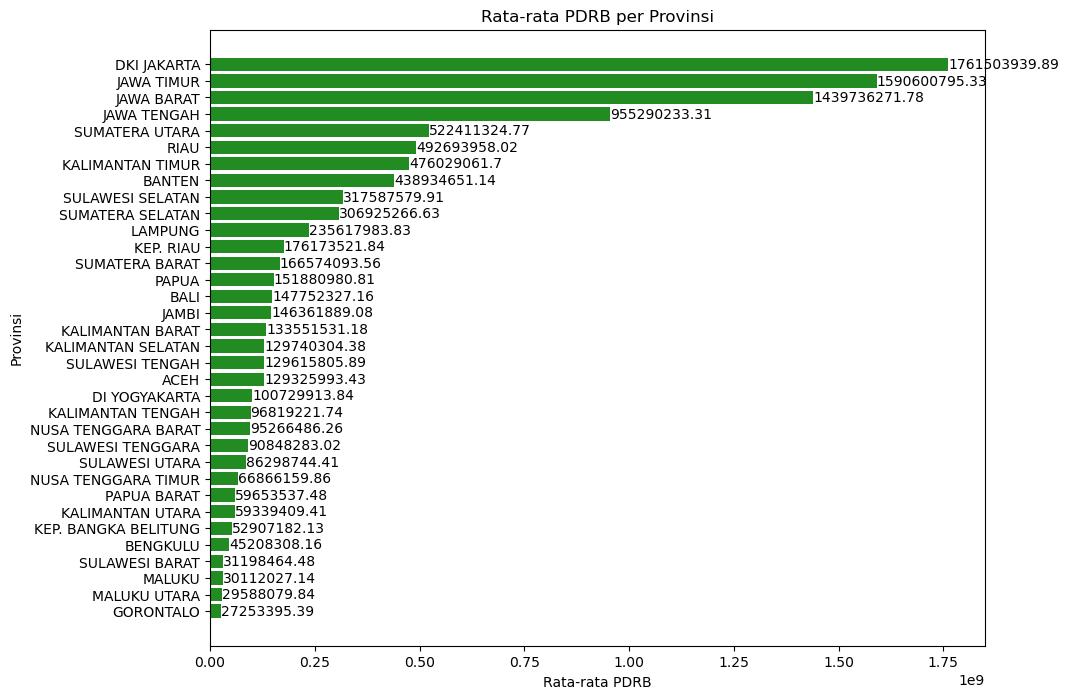

In [11]:
plt.figure(figsize=(10, 8))
plt.barh(avg_pdrb['Provinsi'], avg_pdrb['Rata-rata PDRB'], color='forestgreen')

# kalau mau tambahin label nilai PDRB tiap provinsinya
# tapi agak tidak rapi
for i in range(len(avg_pdrb)):
    plt.text(avg_pdrb['Rata-rata PDRB'].values[i], i, round(avg_pdrb['Rata-rata PDRB'].values[i], 2), 
             color='black', ha="left", va="center")

plt.xlabel('Rata-rata PDRB')
plt.ylabel('Provinsi')
plt.title('Rata-rata PDRB per Provinsi')
plt.show()

### 3 - Melihat rata-rata indeks bencana setiap Provinsi pada tahun 2015-2023

In [12]:
# Mengelompokkan data berdasarkan provinsi dan menghitung rata-rata PDRB
avg_irbi = data.groupby('Provinsi')['indeks bencana'].mean().reset_index()

# Mengubah nama kolom agar lebih informatif
avg_irbi.columns = ['Provinsi', 'Rata-rata Indeks Bencana']

# mengurutkan bedasarkan tertinggi ke terendah
avg_irbi = avg_irbi.sort_values(by='Rata-rata Indeks Bencana', ascending=True)


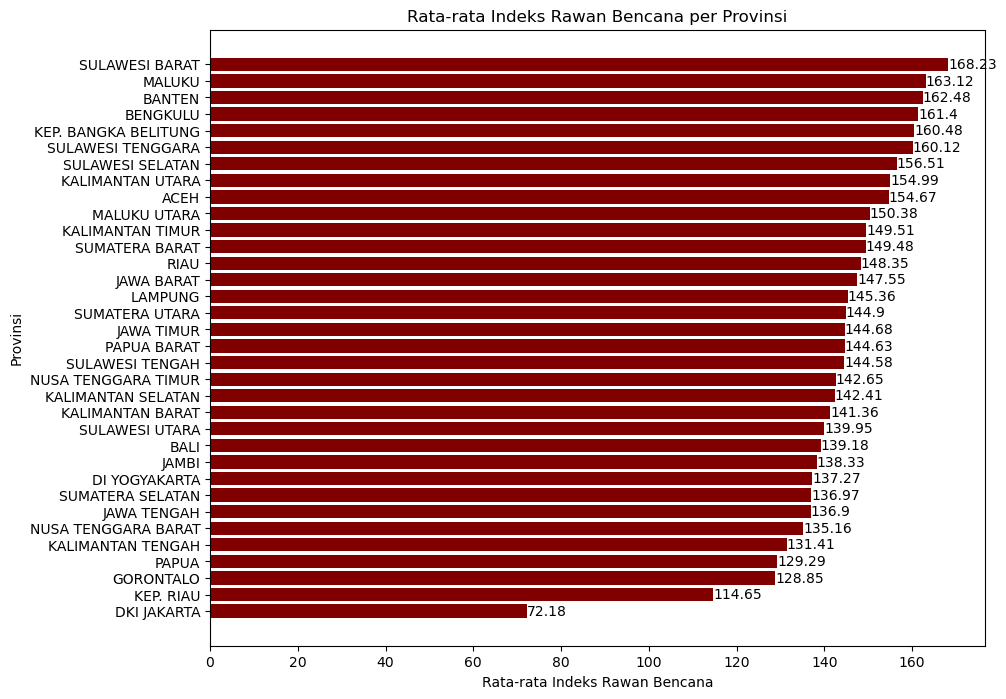

In [13]:
plt.figure(figsize=(10, 8))
plt.barh(avg_irbi['Provinsi'], avg_irbi['Rata-rata Indeks Bencana'], color='maroon')

# kalau mau tambahin label nilai PDRB tiap provinsinya
# tapi agak tidak rapi
for i in range(len(avg_irbi)):
    plt.text(avg_irbi['Rata-rata Indeks Bencana'].values[i], i, round(avg_irbi['Rata-rata Indeks Bencana'].values[i], 2), 
             color='black', ha="left", va="center")

plt.xlabel('Rata-rata Indeks Rawan Bencana')
plt.ylabel('Provinsi')
plt.title('Rata-rata Indeks Rawan Bencana per Provinsi')
plt.show()

### 4 - Melihat korelasi antara tiap-tiap variabel numerik menggunakan Correlation Plot

<Axes: >

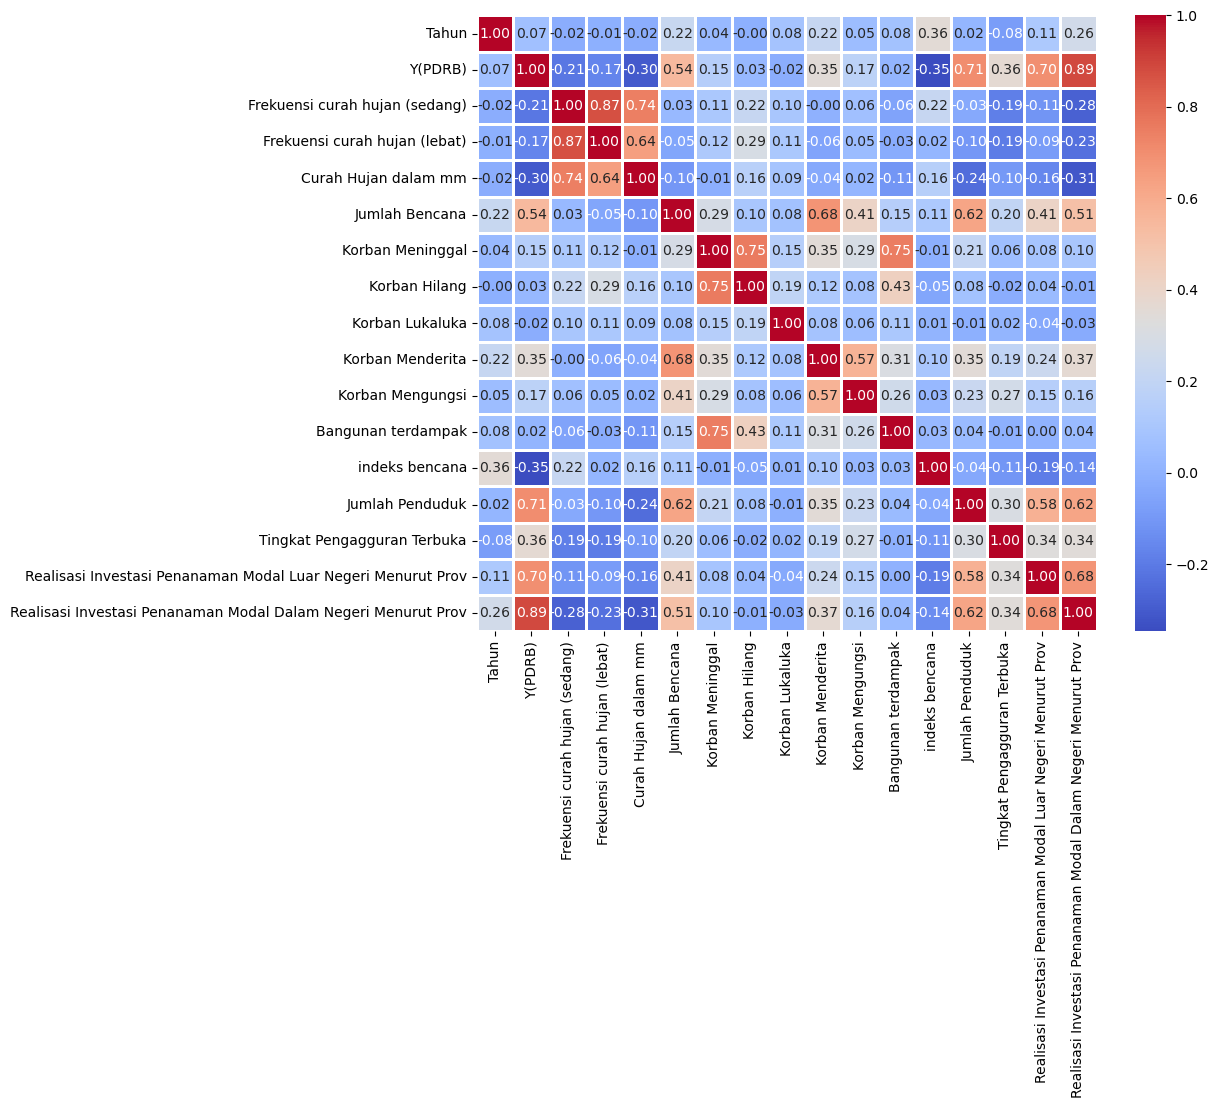

In [14]:
# heatmap
cor1 = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor1,cmap='coolwarm',annot=True,linecolor='white',linewidths=1, fmt = '.2f')


menampilkan correlation plot untuk variabel-variabel yang saling memiliki korelasi kuat.

<Axes: >

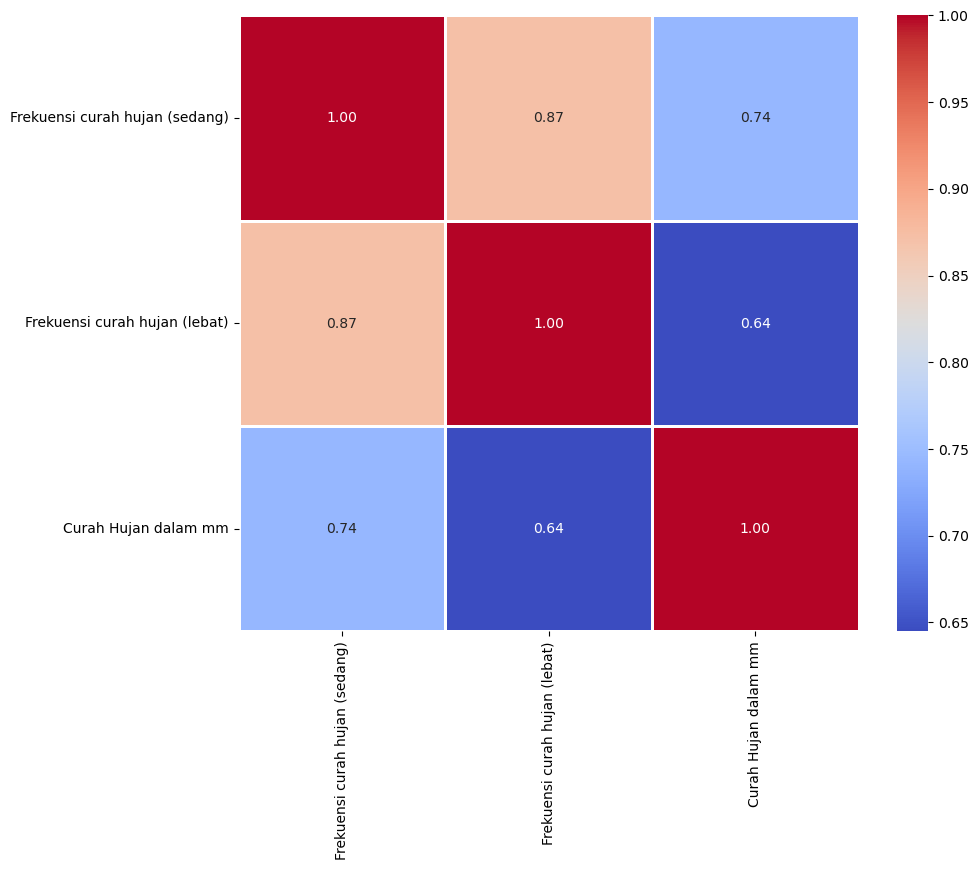

In [15]:
# heatmap variabel bencana
hujan = data[['Frekuensi curah hujan (sedang)', 'Frekuensi curah hujan (lebat)', 'Curah Hujan dalam mm']]
cor2 = hujan.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor2,cmap='coolwarm',annot=True,linecolor='white',linewidths=1, fmt = '.2f')


<Axes: >

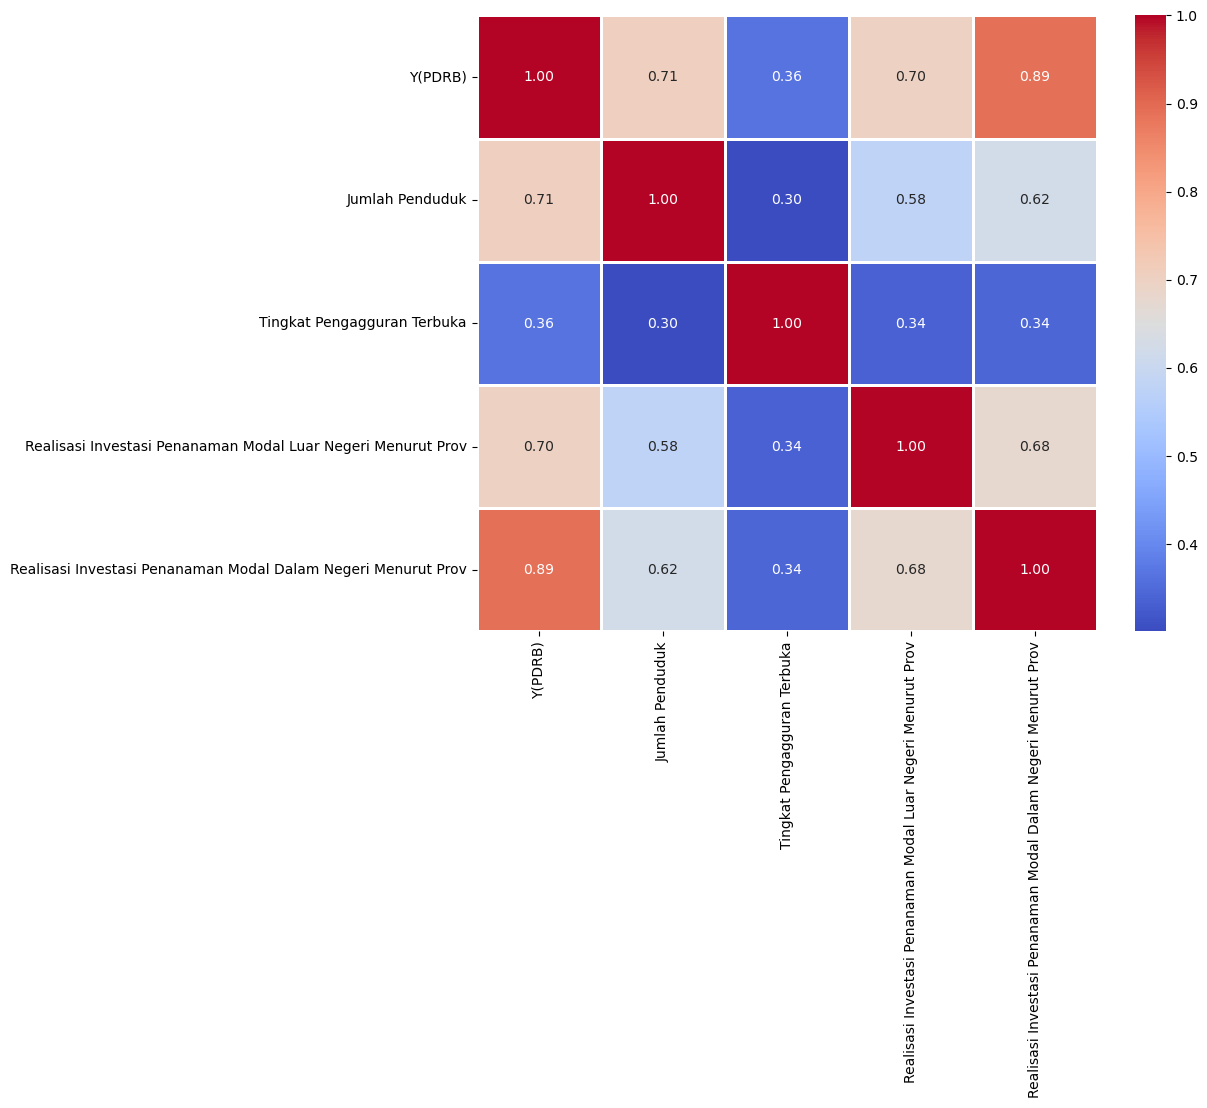

In [16]:
# heatmap variabel ekonomi dan target
eko = data[['Y(PDRB)', 'Jumlah Penduduk', 'Tingkat Pengagguran Terbuka', 'Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov', 'Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov']]
cor3 = eko.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor3,cmap='coolwarm',annot=True,linecolor='white',linewidths=1, fmt = '.2f')


### 5 - Melihat hubungan antara Jumlah Bencana dengan PDRB menggunakan Scatter Plot

LinAlgError: SVD did not converge in Linear Least Squares

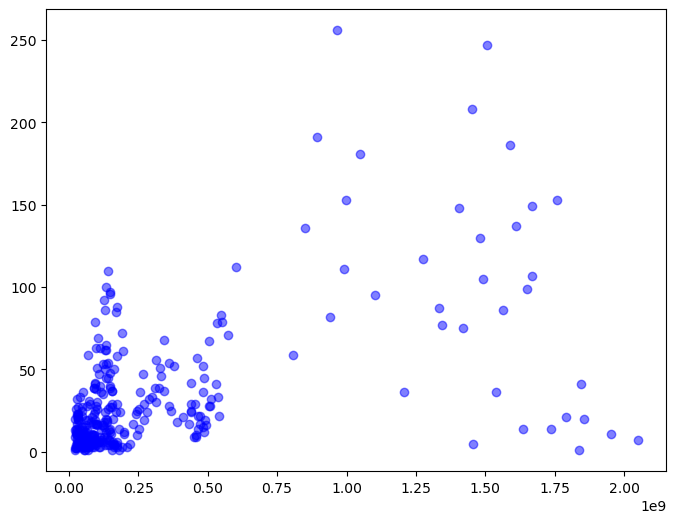

In [17]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Y(PDRB)'], data['Jumlah Bencana'], color='blue', alpha=0.5)

# Menambahkan garis linear
coefficients = np.polyfit(data['Y(PDRB)'], data['Jumlah Bencana'], 1)
poly = np.poly1d(coefficients)
new_x = np.linspace(0, 1, 100)
new_y = poly(new_x)

# Menambahkan garis regresi linier
plt.plot(new_x, new_y, color='red')
# Menambahkan judul dan label sumbu
plt.title('Scatter Plot antara PDRB dan Jumlah Bencana')
plt.xlabel('PDRB')
plt.ylabel('Jumlah Bencana')

# Menghitung koefisien regresi linier
coefficients = np.polyfit(data['Y(PDRB)'], data['Jumlah Bencana'], 1)
poly = np.poly1d(coefficients)
new_x = np.linspace(data['Y(PDRB)'].min(), data['Y(PDRB)'].max(), 100)
new_y = poly(new_x)

# Menambahkan garis regresi linier
plt.plot(new_x, new_y, color='red')

# Menampilkan plot
plt.show()

Melihat besar koefisien korelasi antara Jumlah Bencana dengan PDRB

In [ ]:
data[['Y(PDRB)', 'Jumlah Bencana']].corr(numeric_only=True).values[0,1]

0.5424881524561096

### 6 - Melihat hubungan antara Indeks Bencana dengan PDRB menggunakan Scatter Plot

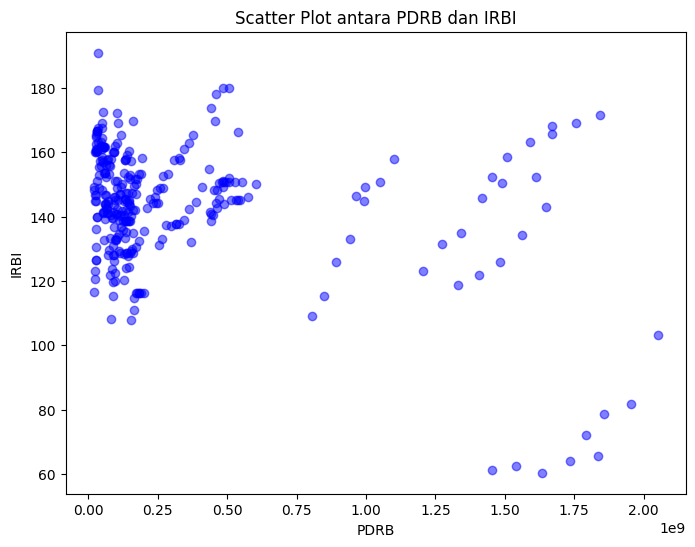

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Y(PDRB)'], data['indeks bencana'], color='blue', alpha=0.5)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot antara PDRB dan IRBI')
plt.xlabel('PDRB')
plt.ylabel('IRBI')

# Menampilkan plot
plt.show()

### 7 - Melihat hubungan antara Jumlah Bencana dengan Indeks Bencana menggunakan Scatter Plot

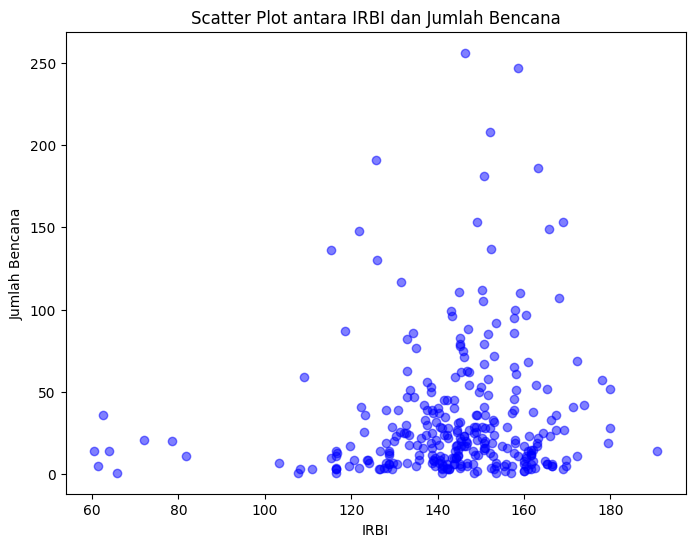

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['indeks bencana'], data['Jumlah Bencana'], color='blue', alpha=0.5)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot antara IRBI dan Jumlah Bencana')
plt.xlabel('IRBI')
plt.ylabel('Jumlah Bencana')

# Menampilkan plot
plt.show()

### 8 - Melihat pergerakan nilai PDRB tiap provinsi dari tahun 2015-2023.

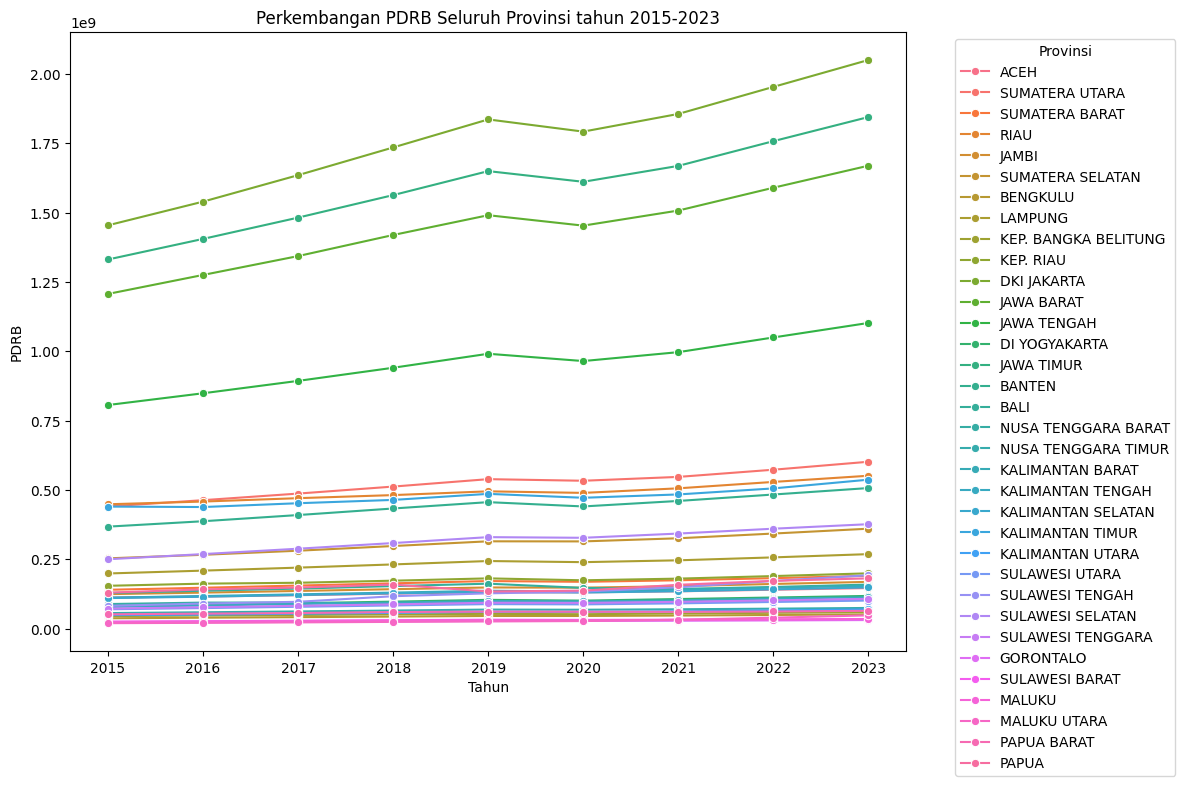

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(x='Tahun', y='Y(PDRB)', hue='Provinsi', data=data, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Perkembangan PDRB Seluruh Provinsi tahun 2015-2023')
plt.xlabel('Tahun')
plt.ylabel('PDRB')
plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Menampilkan plot
plt.show()

### 9 - Melihat Sebaran PDRB per tahun

C:\Users\Annisa Sekar Tierra\AppData\Local\Temp\ipykernel_25496\3688124717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Tahun', y='Y(PDRB)', palette = 'pastel')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


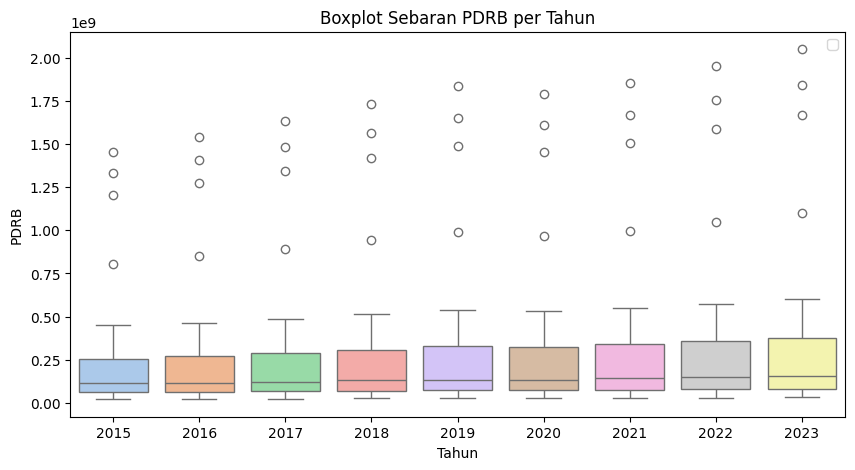

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Tahun', y='Y(PDRB)', palette = 'pastel')
plt.title('Boxplot Sebaran PDRB per Tahun')
plt.ylabel('PDRB')
plt.legend()
plt.show()

# Data Splitting

Memisahkan data train dan test. Diambil data test adalah observasi pada tahun 2023 dan data train adalah observasi pada tahun 2015-2022.

In [18]:
#data except Tahun column is 2023
data_train = data[data['Tahun'] != 2023]
# data test 2023 only
data_test = data[data['Tahun'] == 2023]


In [19]:
data_train = data_train.drop(['Tahun'], axis = 1)
data_test = data_test.drop(['Tahun'], axis = 1)

Memisahkan variabel target dan prediktor pada data train.

In [20]:
X = data_train.drop(['Y(PDRB)'], axis=1)
y = data_train['Y(PDRB)']

# Preprocessing Part 2

Pre processing dilakukan pada data train dan test yang akan menggunakan Pipeline.

In [21]:
display(X.isna().sum(), data_test.isna().sum())

Provinsi                                                         0
Frekuensi curah hujan (sedang)                                   8
Frekuensi curah hujan (lebat)                                    8
Curah Hujan dalam mm                                             8
Jumlah Bencana                                                   4
Korban Meninggal                                                 4
Korban Hilang                                                    4
Korban Lukaluka                                                  4
Korban Menderita                                                 4
Korban Mengungsi                                                 4
Bangunan terdampak                                               4
indeks bencana                                                   0
Jumlah Penduduk                                                  0
Tingkat Pengagguran Terbuka                                      0
Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov  

Provinsi                                                         0
Y(PDRB)                                                          0
Frekuensi curah hujan (sedang)                                   1
Frekuensi curah hujan (lebat)                                    1
Curah Hujan dalam mm                                             1
Jumlah Bencana                                                   1
Korban Meninggal                                                 1
Korban Hilang                                                    1
Korban Lukaluka                                                  1
Korban Menderita                                                 1
Korban Mengungsi                                                 1
Bangunan terdampak                                               1
indeks bencana                                                   0
Jumlah Penduduk                                                  0
Tingkat Pengagguran Terbuka                                   

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor




class imputerFrek(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        frek = ['Frekuensi curah hujan (sedang)', 'Frekuensi curah hujan (lebat)', 'Curah Hujan dalam mm']
        X[frek] = IterativeImputer(estimator=RandomForestRegressor(random_state=0)).fit_transform(X[frek])
        return X

class ImputerKorban(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        numeric = ['Jumlah Bencana', 'Korban Meninggal', 'Korban Hilang','Korban Lukaluka', 'Korban Menderita', 'Korban Mengungsi',
       'Bangunan terdampak', 'indeks bencana']
        X[numeric] = IterativeImputer(estimator=RandomForestRegressor(random_state=0)).fit_transform(X[numeric])
        return X

class ImputerInvest(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        eko = ['Tingkat Pengagguran Terbuka', 'Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov',
       'Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov']
        X[eko] = IterativeImputer(estimator=RandomForestRegressor(random_state=0)).fit_transform(X[eko])
        return X
    
class scaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        num = ['Frekuensi curah hujan (sedang)',
       'Frekuensi curah hujan (lebat)', 'Curah Hujan dalam mm',
       'Jumlah Bencana', 'Korban Meninggal', 'Korban Hilang',
       'Korban Lukaluka', 'Korban Menderita', 'Korban Mengungsi',
       'Bangunan terdampak', 'indeks bencana', 'Jumlah Penduduk',
       'Tingkat Pengagguran Terbuka',
       'Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov',
       'Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov']
        X[num] = MinMaxScaler().fit_transform(X[num])
        return X

class Labelenc(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        categorical_cols = ['Provinsi']
        
        # Inisialisasi LabelEncoder
        label_encoders = {}

        # Lakukan label encoding untuk setiap kolom kategorik
        for col in categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
        return X

In [23]:
from sklearn.pipeline import Pipeline

pipe_prepo = Pipeline([
    ('frek_imputer', imputerFrek()),
    ('korban_imputer', ImputerKorban()),
    ('invest_imputer', ImputerInvest()),
    ('scaler', scaler()),
    ('label encoder', Labelenc())
])

In [24]:
X_train_cv = pipe_prepo.fit_transform(X)

c:\Users\Mahendra\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Mahendra\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
data_test = pipe_prepo.transform(data_test)

In [ ]:
X_train_cv.isna().sum()

Provinsi                                                         0
Tahun                                                            0
Frekuensi curah hujan (sedang)                                   0
Frekuensi curah hujan (lebat)                                    0
Curah Hujan dalam mm                                             0
Jumlah Bencana                                                   0
Korban Meninggal                                                 0
Korban Hilang                                                    0
Korban Lukaluka                                                  0
Korban Menderita                                                 0
Korban Mengungsi                                                 0
Bangunan terdampak                                               0
indeks bencana                                                   0
Jumlah Penduduk                                                  0
Tingkat Pengagguran Terbuka                                   

In [ ]:
display(X_train_cv.head(), data_test.head())

Provinsi  Tahun  Frekuensi curah hujan (sedang)  \
34         0      7                        0.474978   
35        33      7                        0.303742   
36        31      7                        0.510879   
37        25      7                        0.010009   
38         7      7                        0.145997   

    Frekuensi curah hujan (lebat)  Curah Hujan dalam mm  Jumlah Bencana  \
34                       0.296089              0.516180        0.427451   
35                       0.117318              0.419315        0.274510   
36                       0.243948              0.500603        0.090196   
37                       0.000000              0.280575        0.156863   
38                       0.020484              0.352291        0.011765   

    Korban Meninggal  Korban Hilang  Korban Lukaluka  Korban Menderita  \
34          0.053476       0.022727         0.000000          0.314687   
35          0.037433       0.011364         0.000769          0.339289   
36          0.000000       0.034091         0.000000          0.025084   
37          0.000000       0.000000         0.000000          0.029632   
38          0.000000       0.000000         0.000000          0.022889   

    Korban Mengungsi  Bangunan terdampak  indeks bencana  Jumlah Penduduk  \
34          0.709528            0.007935        0.824723         0.097736   
35          0.023023            0.000215        0.715949         0.296804   
36          0.000325            0.004721        0.775511         0.102508   
37          0.006991            0.000323        0.755792         0.122478   
38          0.000000            0.000000        0.683411         0.031538   

    Tingkat Pengagguran Terbuka  \
34                     0.499476   
35                     0.498429   
36                     0.510995   
37                     0.310995   
38                     0.334031   

    Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov  \
34                                           0.016782              
35                                           0.175588              
36                                           0.012507              
37                                           0.367010              
38                                           0.004971              

    Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov  
34                                           0.049492              
35                                           0.255343              
36                                           0.028594              
37                                           0.482579              
38                                           0.099467

Provinsi  Tahun      Y(PDRB)  Frekuensi curah hujan (sedang)  \
0         0      0  146932422.1                        0.486317   
1        33      0  602235951.9                        0.303499   
2        31      0  191071350.9                        0.513683   
3        25      0  551828486.3                        0.010767   
4         7      0  169268774.3                        0.143114   

   Frekuensi curah hujan (lebat)  Curah Hujan dalam mm  Jumlah Bencana  \
0                       0.292683              0.626280        0.862385   
1                       0.118199              0.580381        1.000000   
2                       0.247655              0.702019        0.633028   
3                       0.000000              0.470554        0.697248   
4                       0.018762              0.566938        0.192661   

   Korban Meninggal  Korban Hilang  Korban Lukaluka  Korban Menderita  \
0               0.5       0.000000         0.001524          0.560534   
1               1.0       1.000000         0.022208          0.268595   
2               0.7       0.181818         1.000000          0.111114   
3               0.1       0.000000         0.000000          0.737354   
4               0.5       0.000000         0.000871          0.100145   

   Korban Mengungsi  Bangunan terdampak  indeks bencana  Jumlah Penduduk  \
0          1.000000            0.118072        0.652703         0.100337   
1          0.126506            0.010108        0.535895         0.302139   
2          0.165412            0.063524        0.569448         0.105090   
3          0.348019            1.000000        0.542535         0.127608   
4          0.253566            0.052806        0.443754         0.064752   

   Tingkat Pengagguran Terbuka  \
0                     0.716190   
1                     0.689524   
2                     0.699048   
3                     0.373333   
4                     0.430476   

   Realisasi Investasi Penanaman Modal Luar Negeri Menurut Prov  \
0                                           0.029038              
1                                           0.141745              
2                                           0.013582              
3                                           0.245789              
4                                           0.004447              

   Realisasi Investasi Penanaman Modal Dalam Negeri Menurut Prov  
0                                           0.081988              
1                                           0.216956              
2                                           0.035246              
3                                           0.500587              
4                                           0.082581

---
PCA untuk data train


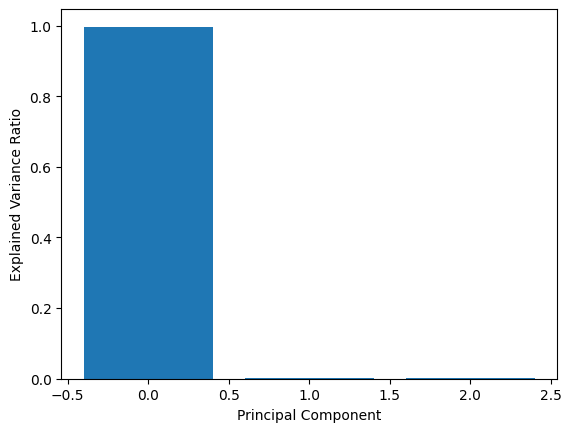

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit the PCA and transform the data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_cv)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
import numpy as np

# Fit the PCA on the data
pca = PCA().fit(X_train_cv)

# Calculate the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 70% of the variance
n_components_70_var = np.where(cumulative_explained_variance > 0.7)[0][0] + 1

print(f'Number of components that explain at least 70% of the variance: {n_components_70_var}')

# Refit the PCA with the selected number of components
pca = PCA(n_components=n_components_70_var)
X_train_pca = pca.fit_transform(X_train_cv)

Number of components that explain at least 70% of the variance: 1


Dengan banyak komponen berjumlah 1 ternyata sudah mencapai nilai variansi yang besar sehingga informasi data tetap dimuat dengan baik.

In [ ]:
display(X_train_pca)

array([[-16.4990512 ],
       [ 16.49680455],
       [ 14.50183402],
       [  8.49667278],
       [ -9.49839383],
       [ 15.49785212],
       [-13.49743754],
       [  1.50026182],
       [ -0.49851709],
       [  0.49848515],
       [-11.50770926],
       [ -8.51189308],
       [ -7.5050007 ],
       [-12.50215098],
       [ -6.50468748],
       [-14.50588421],
       [-15.49743858],
       [  4.49982065],
       [  5.49967261],
       [ -5.49940812],
       [ -3.49951277],
       [ -4.50003066],
       [ -2.50020903],
       [ -1.49726888],
       [ 13.50024332],
       [ 11.49843901],
       [ 10.50123865],
       [ 12.50063508],
       [-10.49744569],
       [  9.50412634],
       [  2.50145036],
       [  3.50081592],
       [  7.50272146],
       [  6.50634947],
       [-16.49769094],
       [ 16.49686754],
       [ 14.50116768],
       [  8.49742366],
       [ -9.4986531 ],
       [ 15.49827802],
       [-13.49712424],
       [  1.5001453 ],
       [ -0.49849464],
       [  0

# Modelling

In [26]:
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import numpy as np
import pandas as pd

In [27]:
y_test = data_test['Y(PDRB)']
X_test = data_test.drop(['Y(PDRB)'], axis = 1)


## Modeling Untuk Data Hasil PCA

### PCA

Akan dilakukan PCA untuk data test terlebih dahulu.

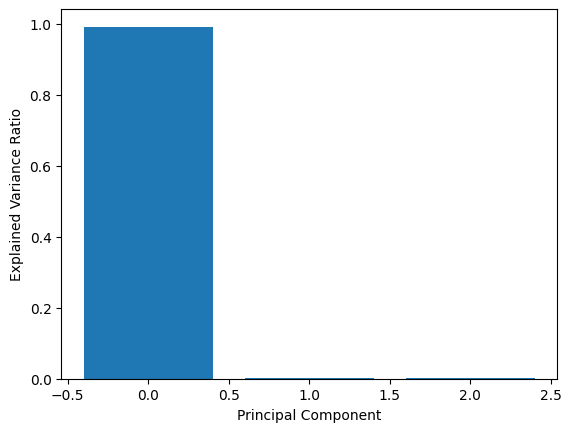

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit the PCA and transform the data
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
import numpy as np

# Fit the PCA on the data
pca = PCA().fit(X_test)

# Calculate the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 70% of the variance
n_components_var = np.where(cumulative_explained_variance > 0.7)[0][0] + 1

print(f'Number of components that explain at least 70% of the variance: {n_components_var}')

# Refit the PCA with the selected number of components
pca = PCA(n_components=n_components_var)
X_test_pca = pca.fit_transform(X_test)

Number of components that explain at least 70% of the variance: 1


Dengan banyak komponen berjumlah 1 ternyata sudah mencapai nilai variansi yang besar sehingga informasi data tetap dimuat dengan baik.

In [ ]:
display(X_test_pca)

array([[-16.49422269],
       [ 16.51092607],
       [ 14.51133807],
       [  8.49679418],
       [ -9.49536846],
       [ 15.49613753],
       [-13.49641681],
       [  1.49990108],
       [ -0.50132216],
       [  0.49624098],
       [-11.5116101 ],
       [ -8.51151695],
       [ -7.50288639],
       [-12.49956237],
       [ -6.50717696],
       [-14.50638066],
       [-15.49770354],
       [  4.50044927],
       [  5.50576455],
       [ -5.49725125],
       [ -3.50098747],
       [ -4.50242867],
       [ -2.50481045],
       [ -1.49971705],
       [ 13.50030785],
       [ 11.49889126],
       [ 10.50099188],
       [ 12.49760551],
       [-10.49697625],
       [  9.50402579],
       [  2.49744165],
       [  3.49838326],
       [  7.49932029],
       [  6.51181899]])

### Cross Validation

In [ ]:
# Daftar model yang akan digunakan
list_model = [
    #XGBRegressor
    XGBRegressor(random_state = 0),
    #Line linear regression
    LinearRegression(),
    #Elastic net regrssion
    ElasticNet(random_state = 0),
    #Bayesian Ridge
    BayesianRidge(),
    # Gradient Boosting Regressor
    GradientBoostingRegressor(random_state = 0),
    #CatBoost Regressor
    CatBoostRegressor(random_state = 0),
    #LightGBM Regressor
    LGBMRegressor(random_state = 0),
]

from sklearn.model_selection import cross_val_score

result = []

for model in list_model:
    # Create pipeline with model
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # Perform cross-validation for each metric
    scores_rmse = cross_val_score(pipeline, X_train_pca, y, cv=5, scoring='neg_mean_squared_error')
    scores_mae = cross_val_score(pipeline, X_train_pca, y, cv=5, scoring='neg_mean_absolute_error')
    scores_ev = cross_val_score(pipeline, X_train_pca, y, cv=5, scoring='explained_variance')
    scores_r2 = cross_val_score(pipeline, X_train_pca, y, cv=5, scoring='r2')
    
    # Calculate metrics
    rmse = np.sqrt(-scores_rmse.mean())
    mae = -scores_mae.mean()
    ev = scores_ev.mean()
    r2 = scores_r2.mean()
    
    result.append({
        'model': model.__class__.__name__,
        'RMSE': rmse,
        'MAE': mae,
        'EV': ev,
        'R-square': r2
    })

# Convert to DataFrame
result_all_pca = pd.DataFrame(result)
result_all_pca


Learning rate set to 0.032162
0:	learn: 406769052.0180745	total: 140ms	remaining: 2m 19s
1:	learn: 400789768.9182201	total: 140ms	remaining: 1m 10s
2:	learn: 395560623.6727946	total: 141ms	remaining: 46.8s
3:	learn: 390768030.2275749	total: 142ms	remaining: 35.3s
4:	learn: 385508147.5084924	total: 142ms	remaining: 28.3s
5:	learn: 380382242.5997035	total: 143ms	remaining: 23.7s
6:	learn: 375702425.6747916	total: 143ms	remaining: 20.4s
7:	learn: 371909523.3528243	total: 144ms	remaining: 17.9s
8:	learn: 366338850.9173249	total: 145ms	remaining: 15.9s
9:	learn: 362362600.3316110	total: 145ms	remaining: 14.4s
10:	learn: 358087873.7789438	total: 146ms	remaining: 13.1s
11:	learn: 355214091.0375519	total: 146ms	remaining: 12.1s
12:	learn: 349801882.0622160	total: 147ms	remaining: 11.2s
13:	learn: 346694789.6033880	total: 148ms	remaining: 10.4s
14:	learn: 342057801.0858773	total: 148ms	remaining: 9.72s
15:	learn: 338427966.6881320	total: 149ms	remaining: 9.14s
16:	learn: 335293106.9956697	total

model          RMSE           MAE            EV  \
0               XGBRegressor  2.198240e+08  7.563805e+07  7.231129e-01   
1           LinearRegression  4.251670e+08  3.016181e+08  5.311767e-02   
2                 ElasticNet  4.251654e+08  3.015384e+08  5.321073e-02   
3              BayesianRidge  4.388316e+08  3.000155e+08  1.354472e-14   
4  GradientBoostingRegressor  6.108127e+07  4.022491e+07  9.846992e-01   
5          CatBoostRegressor  6.325239e+07  3.772769e+07  9.827507e-01   
6              LGBMRegressor  2.454861e+08  1.498884e+08  6.904479e-01   

   R-square  
0  0.707884  
1  0.031926  
2  0.031987  
3 -0.028255  
4  0.979865  
5  0.978396  
6  0.683277

---
cek akurasi di test set habis PCA

In [ ]:
pipeline_pca_cv_model = Pipeline([
        ('classifier', GradientBoostingRegressor(random_state = 0))
    ])

pipeline_pca_cv_model.fit(X_train_pca, y)
y_pred = pipeline_pca_cv_model.predict(X_test_pca)

# List kosong untuk menyimpan semua hasil pengukuran
result = []

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
result.append({
    'model': 'Gradient Boosting Regressor',
    'RMSE': rmse,
    'MAE': mae,
    'EV': ev,
    'R-square': r2
})

# Ubah menjadi dataframe
result_all_pca_ac = pd.DataFrame(result)
print(result_all_pca_ac)


                         model          RMSE           MAE        EV  R-square
0  Gradient Boosting Regressor  1.074621e+08  6.357595e+07  0.966664  0.956246


### Tuning

In [ ]:
model_pca_cv_tune = GradientBoostingRegressor(random_state = 0)
model_pca_cv_tune.fit(X_train_pca, y)

GradientBoostingRegressor(random_state=0)

In [ ]:
# Define the parameters
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of iterations for random search
n_iter_search = 40

random_search_pca = RandomizedSearchCV(estimator=model_pca_cv_tune, param_distributions=parameters, 
                                   n_iter=n_iter_search, cv=4, n_jobs=-1, random_state=0)
random_search_pca.fit(X_train_pca, y)

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [ ]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search_pca.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search_pca.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search_pca.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(max_depth=4, min_samples_split=4, random_state=0)

 The best score across ALL searched params:
 0.9813225461253485

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


### Model terbaik

Akurasi terhadap test set

In [ ]:
pipeline_pca_best_model = Pipeline([
        ('classifier', GradientBoostingRegressor(n_estimators = 500, min_samples_split=6,min_samples_leaf=2,max_depth=7,learning_rate=0.01,random_state=0))
    ])

pipeline_pca_best_model.fit(X_train_pca, y)
y_pred = pipeline_pca_best_model.predict(X_test_pca)

# List kosong untuk menyimpan semua hasil pengukuran
result = []

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
result.append({
    'model': 'Gradient Boosting Regressor',
    'RMSE': rmse,
    'MAE': mae,
    'EV': ev,
    'R-square': r2
})

# Ubah menjadi dataframe
result_all_pcat = pd.DataFrame(result)
print(result_all_pcat)

                         model          RMSE           MAE        EV  R-square
0  Gradient Boosting Regressor  1.025364e+08  5.208733e+07  0.970345  0.960165


## Modeling Tanpa PCA

### Cross validation

In [ ]:
# Daftar model yang akan digunakan
list_model = [
    #XGBRegressor
    XGBRegressor(random_state = 0),
    #Line linear regression
    LinearRegression(),
    #Elastic net regrssion
    ElasticNet(random_state = 0),
    #Bayesian Ridge
    BayesianRidge(),
    # Gradient Boosting Regressor
    GradientBoostingRegressor(random_state = 0),
    #CatBoost Regressor
    CatBoostRegressor(random_state = 0),
    #LightGBM Regressor
    LGBMRegressor(random_state = 0),
]

from sklearn.model_selection import cross_val_score

result = []

for model in list_model:
    # Create pipeline with model
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # Perform cross-validation for each metric
    scores_rmse = cross_val_score(pipeline, X_train_cv, y, cv=5, scoring='neg_mean_squared_error')
    scores_mae = cross_val_score(pipeline, X_train_cv, y, cv=5, scoring='neg_mean_absolute_error')
    scores_ev = cross_val_score(pipeline, X_train_cv, y, cv=5, scoring='explained_variance')
    scores_r2 = cross_val_score(pipeline, X_train_cv, y, cv=5, scoring='r2')
    
    # Calculate metrics
    rmse = np.sqrt(-scores_rmse.mean())
    mae = -scores_mae.mean()
    ev = scores_ev.mean()
    r2 = scores_r2.mean()
    
    result.append({
        'model': model.__class__.__name__,
        'RMSE': rmse,
        'MAE': mae,
        'EV': ev,
        'R-square': r2
    })

# Convert to DataFrame
result_all = pd.DataFrame(result)
print(result_all)


Learning rate set to 0.032162
0:	learn: 404215248.4602910	total: 2.65ms	remaining: 2.64s
1:	learn: 396856139.0132665	total: 4.63ms	remaining: 2.31s
2:	learn: 389146845.8463863	total: 6.1ms	remaining: 2.03s
3:	learn: 382151920.1904718	total: 7.43ms	remaining: 1.85s
4:	learn: 374254471.1816007	total: 8.57ms	remaining: 1.71s
5:	learn: 367130559.7623739	total: 9.64ms	remaining: 1.6s
6:	learn: 360004018.4194207	total: 11.4ms	remaining: 1.61s
7:	learn: 354561299.0460057	total: 13.4ms	remaining: 1.66s
8:	learn: 347869176.9638497	total: 14.6ms	remaining: 1.61s
9:	learn: 341781634.8084875	total: 15.8ms	remaining: 1.56s
10:	learn: 335704870.2169771	total: 16.9ms	remaining: 1.52s
11:	learn: 330853467.1262597	total: 18ms	remaining: 1.48s
12:	learn: 324774042.8131059	total: 19ms	remaining: 1.44s
13:	learn: 318238019.0875429	total: 20.2ms	remaining: 1.42s
14:	learn: 312909747.9951867	total: 21.5ms	remaining: 1.41s
15:	learn: 307829512.1714186	total: 23ms	remaining: 1.42s
16:	learn: 302429266.4247470

In [ ]:
result_all

model          RMSE           MAE            EV  \
0               XGBRegressor  1.926284e+08  7.485484e+07  8.296352e-01   
1           LinearRegression  1.618418e+08  1.102529e+08  8.715603e-01   
2                 ElasticNet  3.735082e+08  2.621791e+08  2.765083e-01   
3              BayesianRidge  4.388316e+08  3.000155e+08  1.374456e-14   
4  GradientBoostingRegressor  1.401976e+08  6.757467e+07  9.095366e-01   
5          CatBoostRegressor  1.483510e+08  7.012480e+07  8.986391e-01   
6              LGBMRegressor  1.587687e+08  9.473549e+07  8.759354e-01   

   R-square  
0  0.827479  
1  0.866124  
2  0.260712  
3 -0.028255  
4  0.908169  
5  0.896903  
6  0.871149

In [ ]:
pipeline_nopca_cv_model = Pipeline([
        ('classifier', GradientBoostingRegressor(random_state = 0))
    ])

pipeline_nopca_cv_model.fit(X_train_cv, y)
y_pred = pipeline_nopca_cv_model.predict(X_test)

# List kosong untuk menyimpan semua hasil pengukuran
result = []

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
result.append({
    'model': 'Gradient Boosting Regressor',
    'RMSE': rmse,
    'MAE': mae,
    'EV': ev,
    'R-square': r2
})

# Ubah menjadi dataframe
result_all_nopca_ac = pd.DataFrame(result)
print(result_all_nopca_ac)


                         model          RMSE           MAE        EV  R-square
0  Gradient Boosting Regressor  1.856451e+08  1.244616e+08  0.881744   0.86942


### Tuning

In [26]:
model_nopca_cv_tune = GradientBoostingRegressor(random_state = 0)
model_nopca_cv_tune.fit(X_train_cv, y)

GradientBoostingRegressor(random_state=0)

In [27]:
# Define the parameters
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations for random search
n_iter_search = 40

random_search_nopca = RandomizedSearchCV(estimator=model_nopca_cv_tune, param_distributions=parameters, 
                                   n_iter=n_iter_search, cv=4, n_jobs=-1, random_state=0)
random_search_nopca.fit(X_train_cv, y)

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [30]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search_nopca.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search_nopca.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search_nopca.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(n_estimators=400, random_state=0)

 The best score across ALL searched params:
 0.8388127994039811

 The best parameters across ALL searched params:
 {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


### Model Terbaik

In [28]:
pipeline_nopca_best_model = Pipeline([
        ('classifier', GradientBoostingRegressor(n_estimators = 400, min_samples_split=2,min_samples_leaf=1,max_depth=3,learning_rate=0.1,random_state=0))
    ])

pipeline_nopca_best_model.fit(X_train_cv, y)
y_pred_best = pipeline_nopca_best_model.predict(X_test)

# List kosong untuk menyimpan semua hasil pengukuran
result = []

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
ev = explained_variance_score(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)
    
result.append({
    'model': 'Gradient Boosting Regressor',
    'RMSE': rmse,
    'MAE': mae,
    'EV': ev,
    'R-square': r2
})

# Ubah menjadi dataframe
result_all_cv = pd.DataFrame(result)
print(result_all_cv)

                         model          RMSE           MAE        EV  R-square
0  Gradient Boosting Regressor  1.784807e+08  1.193094e+08  0.888965  0.879304


# Post Analysis

## Feature Importance

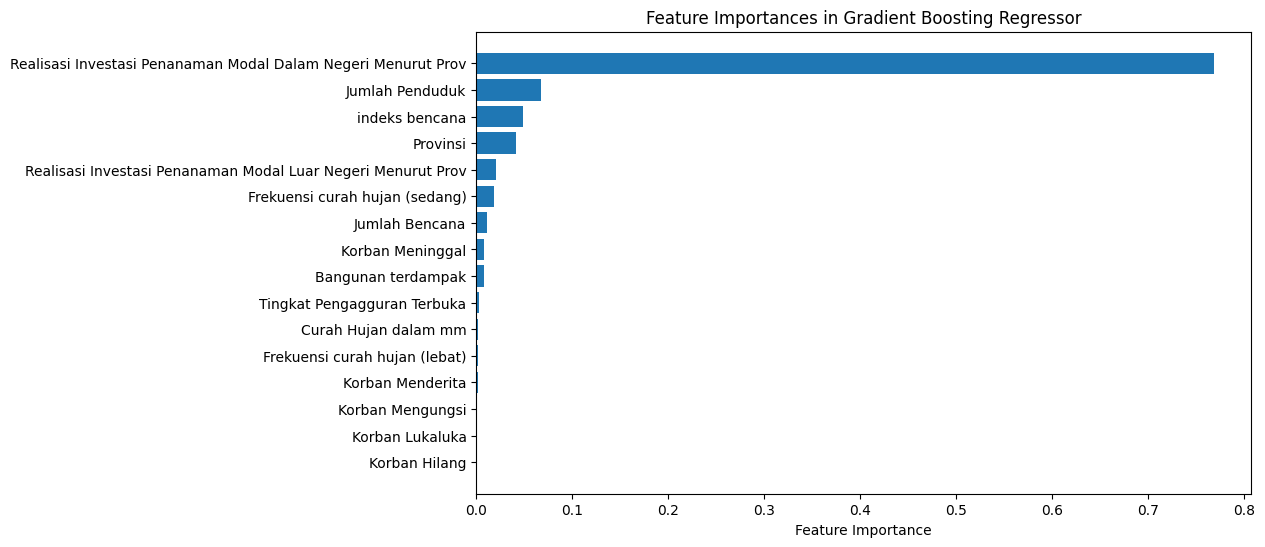

In [32]:
model = GradientBoostingRegressor(n_estimators = 400, min_samples_split=2,min_samples_leaf=1,max_depth=3,learning_rate=0.1,random_state=0)
model.fit(X_train_cv, y)

# Dapatkan fitur penting
feature_importances = model.feature_importances_

# Buat plot fitur penting
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Gradient Boosting Regressor')
plt.show()

## Barchart Between Prediction and Actual Target Variable

In [29]:
yactual = data[data['Tahun'] == 2023]

In [30]:
# ambil y actual dan provinsi
actual = yactual[['Provinsi', 'Y(PDRB)']]


In [31]:
ypredbest_pd = pd.DataFrame(y_pred_best)

In [79]:
display(actual, ypredbest_pd)

Provinsi       Y(PDRB)
0          0  1.469324e+08
1         33  6.022360e+08
2         31  1.910714e+08
3         25  5.518285e+08
4          7  1.692688e+08
5         32  3.609110e+08
6          3  5.204088e+07
7         18  2.692405e+08
8         16  6.033814e+07
9         17  2.000439e+08
10         5  2.050466e+09
11         8  1.669417e+09
12         9  1.102563e+09
13         4  1.186268e+08
14        10  1.844809e+09
15         2  5.074272e+08
16         1  1.594476e+08
17        21  1.039059e+08
18        22  7.525756e+07
19        11  1.549808e+08
20        13  1.136115e+08
21        12  1.492310e+08
22        14  5.376300e+08
23        15  6.981676e+07
24        30  1.020705e+08
25        28  1.931814e+08
26        27  3.771622e+08
27        29  1.081530e+08
28         6  3.164760e+07
29        26  3.542601e+07
30        19  3.532240e+07
31        20  4.849474e+07
32        24  6.496402e+07
33        23  1.819265e+08

0
0   1.725837e+08
1   8.745964e+08
2   2.058440e+08
3   8.420358e+08
4   1.597228e+08
5   5.455735e+08
6   4.756722e+07
7   1.987007e+08
8   1.258880e+08
9   4.147502e+08
10  1.639043e+09
11  1.544935e+09
12  1.261213e+09
13  9.837548e+07
14  1.672693e+09
15  8.036474e+08
16  1.154045e+08
17  6.248639e+08
18  1.246479e+08
19  2.316814e+08
20  2.143482e+08
21  2.530089e+08
22  1.032688e+09
23  1.560482e+08
24  1.197017e+08
25  2.014289e+08
26  3.180409e+08
27  9.283677e+07
28  8.189272e+07
29  2.053805e+07
30  5.126483e+07
31  1.355522e+08
32  3.265400e+07
33  5.382007e+07

In [32]:
# menggabungkan
act_pred = pd.concat([actual, ypredbest_pd], axis = 1)

In [33]:
act_pred = act_pred.rename(columns = {'Y(PDRB)' : 'Actual PDRB', 0 : 'Predicted PDRB'})

In [105]:
act_pred.head()

Provinsi  Actual PDRB  Predicted PDRB
0            ACEH  146932422.1    1.725837e+08
1  SUMATERA UTARA  602235951.9    8.745964e+08
2  SUMATERA BARAT  191071350.9    2.058440e+08
3            RIAU  551828486.3    8.420358e+08
4           JAMBI  169268774.3    1.597228e+08

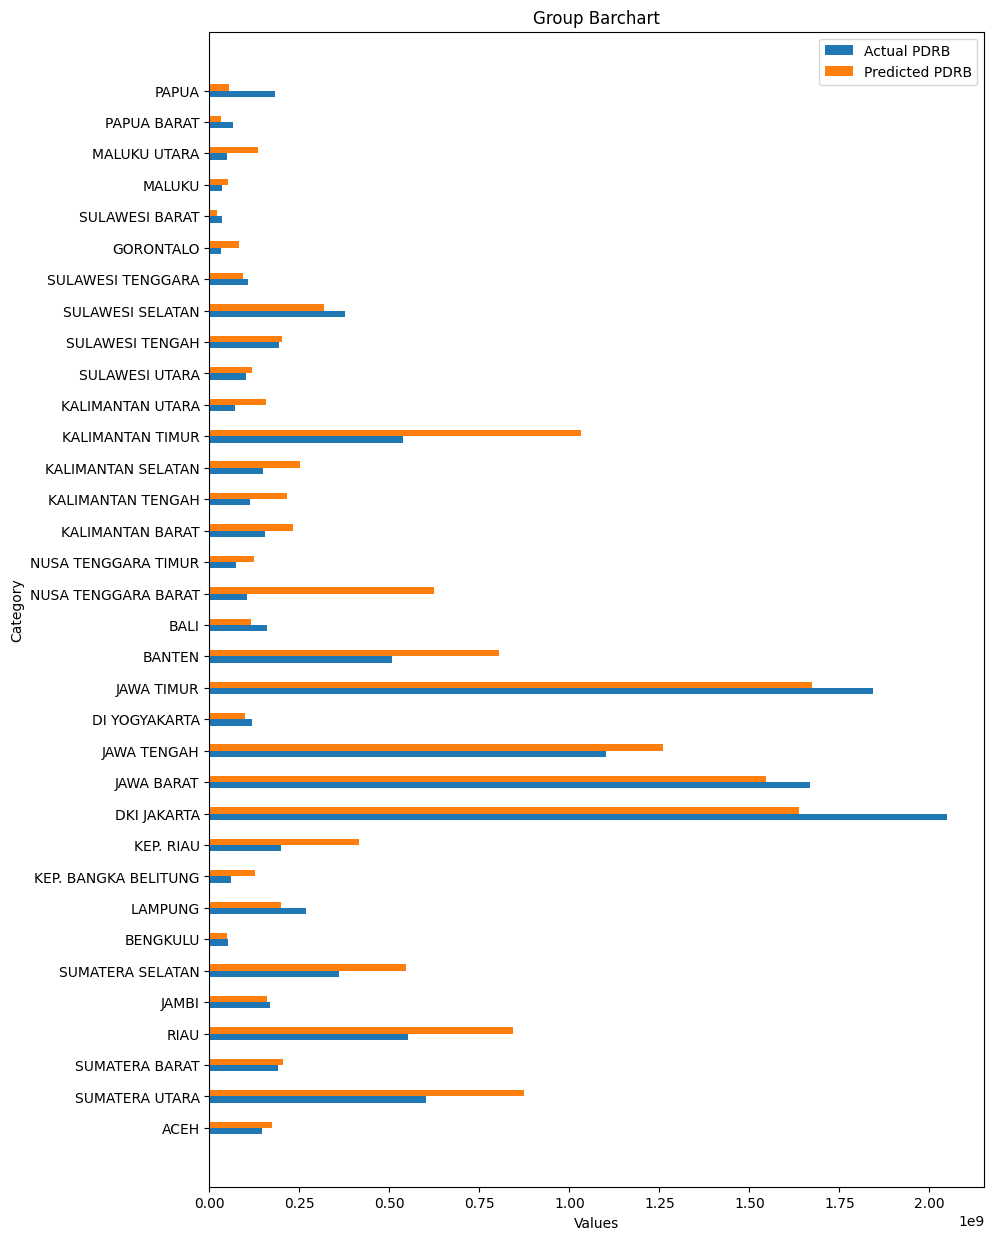

In [104]:
# Menyiapkan data untuk plotting
categories = act_pred['Provinsi']
values = act_pred.drop('Provinsi', axis=1)

# Pengaturan posisi bar
bar_height = 0.2
indices = np.arange(len(categories))

# Membuat plot with extended vertical size
fig, ax = plt.subplots(figsize=(10, 15))  # Adjust the second value to increase the vertical size

for i, col in enumerate(values.columns):
    ax.barh(indices + i * bar_height, values[col], height=bar_height, label=col)

# Pengaturan label dan judul
ax.set_ylabel('Category', fontsize=10)  # Adjust the fontsize to minimize the y-label
ax.set_xlabel('Values')
ax.set_title('Group Barchart')
ax.set_yticks(indices + bar_height * (len(values.columns) - 1) / 2)
ax.set_yticklabels(categories, fontsize=10)  # Adjust the fontsize to minimize the y-tick labels
ax.legend()

# Menampilkan plot
plt.show()

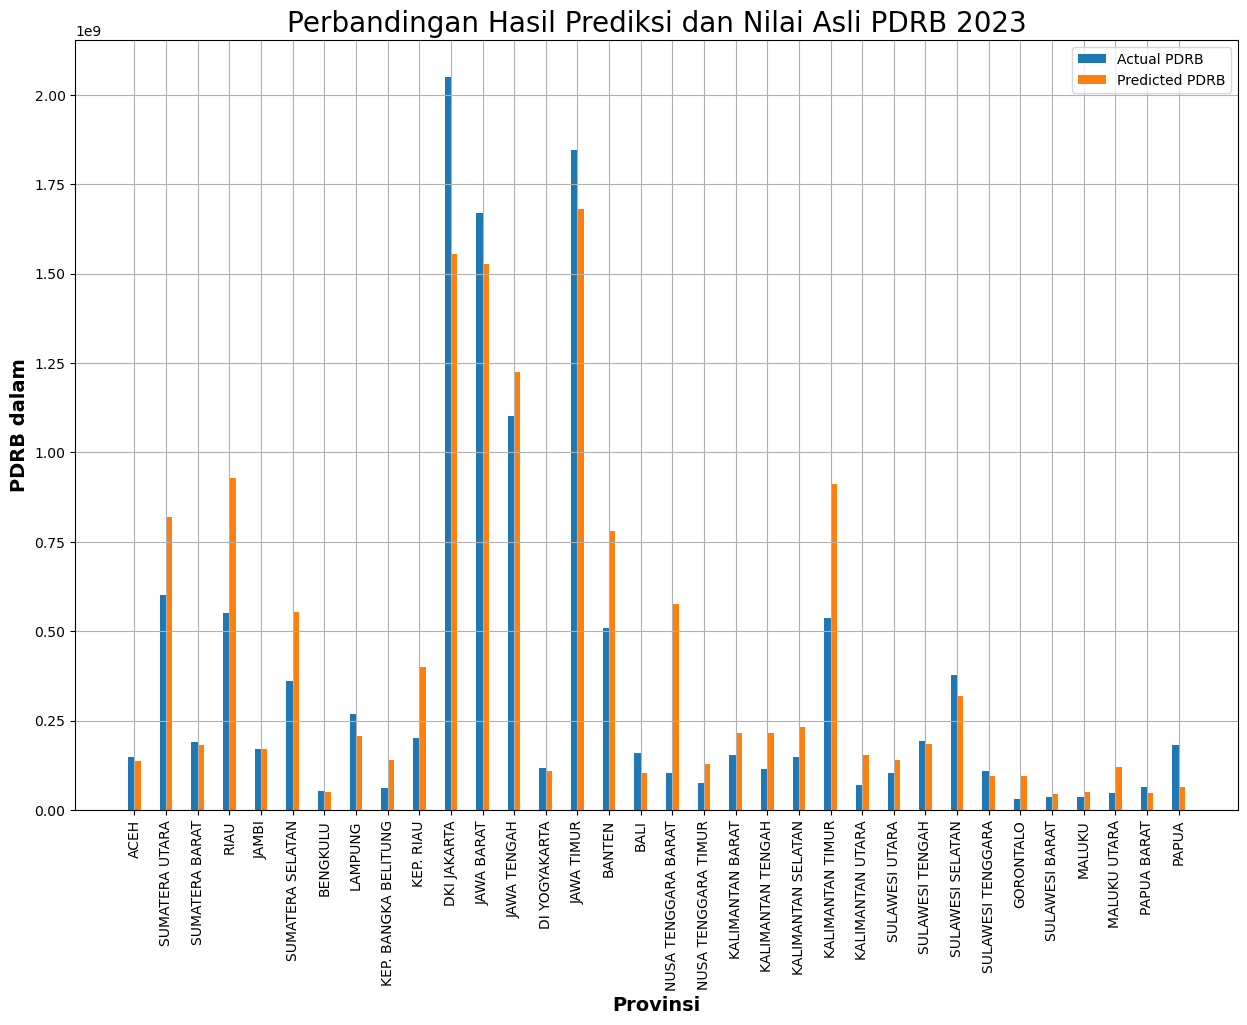

In [40]:
# Menyiapkan data untuk plotting
categories = act_pred['Provinsi']
values = act_pred.drop('Provinsi', axis=1)

# Pengaturan posisi bar
bar_width = 0.2
indices = np.arange(len(categories))

# Membuat plot with extended horizontal size
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the first value to increase the horizontal size

for i, col in enumerate(values.columns):
    ax.bar(indices + i * bar_width, values[col], width=bar_width, label=col)

# Pengaturan label dan judul
ax.set_xlabel('Provinsi', fontsize=14,fontweight='bold')  # Adjust the fontsize to minimize the x-label
ax.set_ylabel('PDRB dalam',fontweight='bold',fontsize=14)
ax.set_title('Perbandingan Hasil Prediksi dan Nilai Asli PDRB 2023',fontsize=20)
ax.set_xticks(indices + bar_width * (len(values.columns) - 1) / 2)
ax.set_xticklabels(categories, fontsize=10, rotation=90)  # Adjust the fontsize and add rotation to minimize the x-tick labels
ax.legend()
plt.grid(True)
# Menampilkan plot
plt.show()